#### Data was downloaded from https://archive.ics.uci.edu/ml/datasets/Air+Quality#

### Task description
1. Draw the average value of air humidity (RH - Relative Humidity (%)) in the following days on the graph. Display the chart title and sign the axes.
2. Find and fill blank values of RH feature with its median.
3. Find the outliers of the RH variable. Add a new "outlier" column accepting True/False values depending on whether the value has been identified as an outlier. Draw a new graph of the RH variable: x-axis - sample index, y-axis - RH value. Mark outliers on the chart with red color and add a legend.
5. Draw a histogram for the variable T (temperature). Make short conclusions.
6. Examine the correlation of the RH and T features. Present the results using the correlation matrix. Write short conclusions. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=',')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### For this task we need only humidity and temperature, so we can remove the rest

In [6]:
df.drop(df.columns[1:12], inplace=True, axis = 1)
df

,Date,T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(df.columns[3:], inplace=True, axis = 1)
df

,Date,T,RH
0,10/03/2004,13.6,48.9
1,10/03/2004,13.3,47.7
2,10/03/2004,11.9,54.0
3,10/03/2004,11.0,60.0
4,10/03/2004,11.2,59.6
...,...,...,...
9466,NaN,NaN,NaN
9467,NaN,NaN,NaN
9468,NaN,NaN,NaN
9469,NaN,NaN,NaN


#### Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9357 non-null   object 
 1   T       9357 non-null   float64
 2   RH      9357 non-null   float64
dtypes: float64(2), object(1)
memory usage: 222.1+ KB


#### It looks like that we have missing values and also the dates are as an object data type (we will change this later).
Let's sum up the values


In [9]:
df.isna().sum()

Date    114
T       114
RH      114
dtype: int64

In [10]:
# Let's also check statistical values for humidity and temperature 
df.describe()

,T,RH
count,9357.000000,9357.000000
mean,9.778305,39.485380
std,43.203623,51.216145
min,-200.000000,-200.000000
25%,10.900000,34.100000
50%,17.200000,48.600000
75%,24.100000,61.900000
max,44.600000,88.700000


#### In the humidity data (shown in %) there are also negative values. We will have to remove them.

In [11]:
df.tail(115)

,Date,T,RH
9356,04/04/2005,28.5,13.1
9357,NaN,NaN,NaN
9358,NaN,NaN,NaN
9359,NaN,NaN,NaN
9360,NaN,NaN,NaN
...,...,...,...
9466,NaN,NaN,NaN
9467,NaN,NaN,NaN
9468,NaN,NaN,NaN
9469,NaN,NaN,NaN


#### All the rows below 9356 are filled with NaN values. We could remove the considering the fact that they will be filled with the median later on. Let's see first how the humidity chart looks like.

In [12]:
# Before we draw the chart let's change the dtype of date column to "datetime"
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
# We will group data with dates and get the mean value for every day (dates are repeated) 
df_group = df.groupby(["Date"]).mean()

In [14]:
# Reset the indexes
df_group = df_group.reset_index()

In [15]:
df_temp = pd.DataFrame(df_group)
df_temp.head(20)

,Date,T,RH
0,2004-01-04,-11.420833,19.741667
1,2004-01-05,20.150000,52.183333
2,2004-01-06,20.325000,66.154167
3,2004-01-07,30.450000,39.691667
4,2004-01-08,30.654167,42.120833
5,2004-01-09,27.070833,42.091667
6,2004-01-10,12.820833,49.391667
7,2004-01-11,21.229167,70.091667
8,2004-01-12,10.891667,77.000000
9,2004-02-04,17.941667,49.104167


In [16]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   T       391 non-null    float64       
 2   RH      391 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.3 KB


#### With the data prepared we can make a chart for medium humidity for every day.

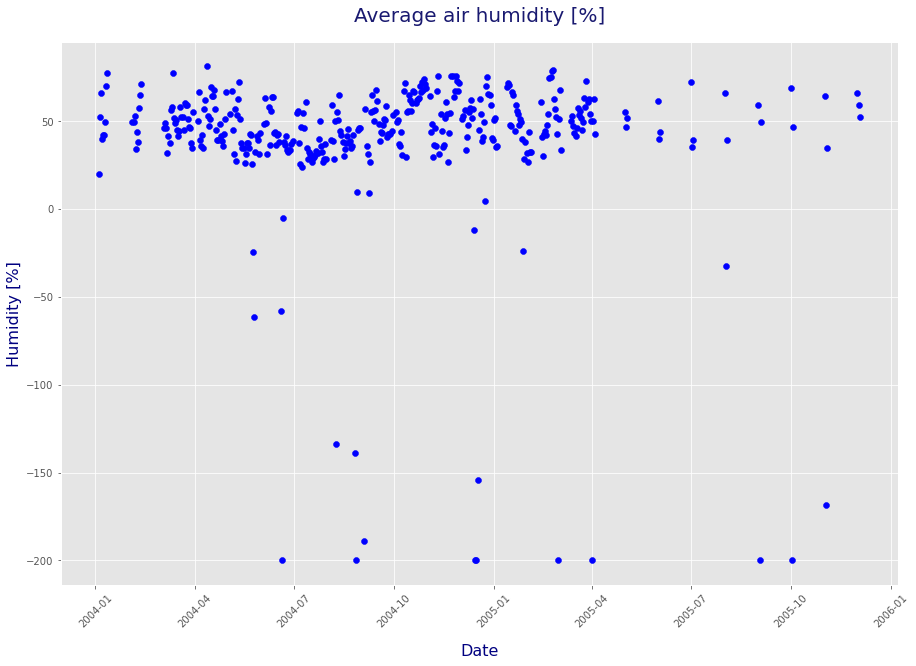

In [23]:
x = df_temp["Date"]
y = df_temp["RH"]
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.grid(b=True, which="major", linestyle="-")
plt.xlabel("Date", fontsize = 16, labelpad = 15, color = "navy")
plt.ylabel("Humidity [%]", fontsize = 16, color = "navy")
plt.title("Average air humidity [%]", fontsize = 20, color = "midnightblue", pad=20)
plt.xticks(rotation=45)
plt.scatter(x, y, color="blue");

### Filling NaN with the media

In [18]:
df["RH"].fillna(df["RH"].median(), inplace=True)

### Outliers

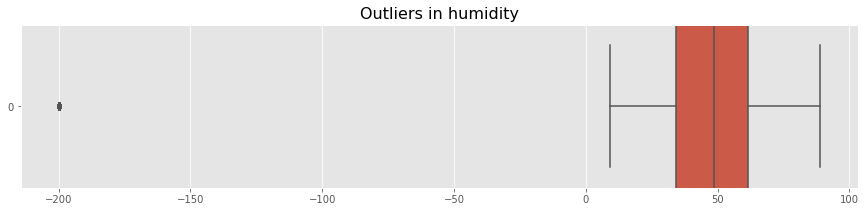

In [24]:
# Let's check outliers on a plot

fig, ax = plt.subplots(1, 1, figsize=(15,3))
ax.set_title('Outliers in humidity', fontsize=16)
sns.boxplot(data=df["RH"], width=1.5, orient='h');

In [20]:
# Calculations
Q1 = df['RH'].quantile(0.25)
Q3 = df['RH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
IQR, lower, upper

(27.450000000000003, -6.925000000000004, 102.875)

#### The values below "lower" are outliers. The maximum value of RH is not more than 100 so we can skip upper. We can create new column for outliers.

In [21]:
df["outliers"] = np.where(df["RH"] < lower, True, False)
df.head(20)

,Date,T,RH,outliers
0,2004-10-03,13.6,48.9,False
1,2004-10-03,13.3,47.7,False
2,2004-10-03,11.9,54.0,False
3,2004-10-03,11.0,60.0,False
4,2004-10-03,11.2,59.6,False
5,2004-10-03,11.2,59.2,False
6,2004-11-03,11.3,56.8,False
7,2004-11-03,10.7,60.0,False
8,2004-11-03,10.7,59.7,False
9,2004-11-03,10.3,60.2,False


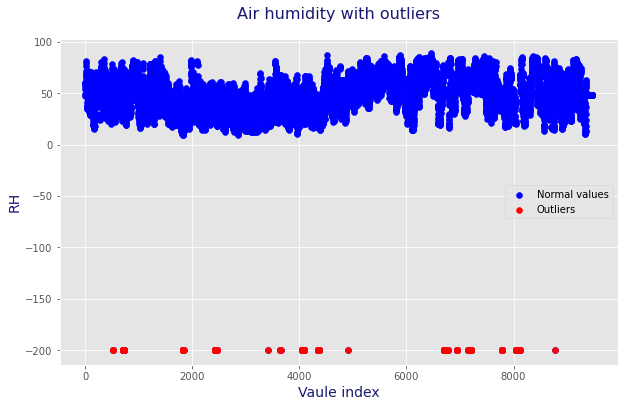

In [25]:
# Plot of RH with marked oultiers
df_out = df.query('RH <= -6.925')
plt.figure(figsize=(10,6))
plt.scatter(df.index, df["RH"], color="blue", label = "Normal values")
plt.xlabel("Vaule index", fontsize = 14, color = "midnightblue")
plt.ylabel("RH", fontsize = 14, color = "midnightblue")
plt.title("Air humidity with outliers", fontsize = 16, color = "midnightblue", pad=20)
plt.scatter(df_out.index, df_out.RH, color="red", label = "Outliers")
plt.legend(loc = "best");

### Temperature histogram

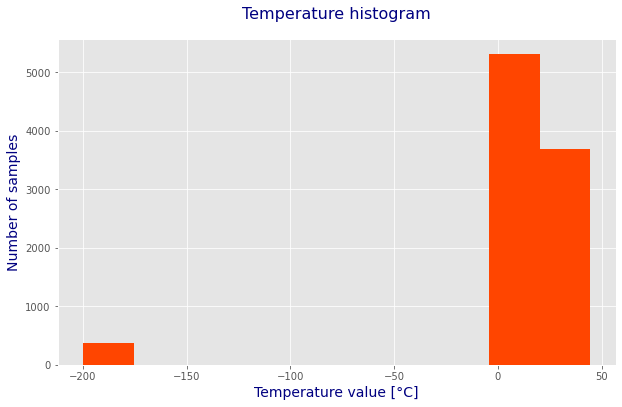

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df["T"], color="orangered")
plt.xlabel("Temperature value [°C]", fontsize = 14, color = "navy")
plt.ylabel("Number of samples", fontsize = 14, color = "navy")
plt.title("Temperature histogram", fontsize = 16, color = "navy", pad=20);

#### The temperature values in the dataset range from -200 ° C to + 44.6 ° C, with negative values only representing a small fraction of the dataset. As in the case of the RH variable, there are also outliers (e.g. incorrect measurement). The actual temperatures, which make up the majority of the dataset, are around -5 ° C to + 44.6 ° C.

### Correlation matrix for RH i T

In [27]:
df["T"].corr(df["RH"])

0.8859105241276147

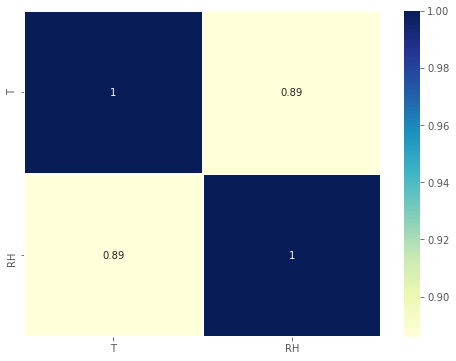

In [28]:
df_1 = df.drop("outliers", axis=1)
corr_matrix = df_1.corr()
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=1,
                 cmap = "YlGnBu")

#### A high value (0.89) indicates a high positive correlation between the features of humidity and temperature. This means that these values are interdependent. As the temperature rises, so does the humidity value.